In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read,write
from IPython.display import Audio
from numpy.fft import fft, ifft, fftfreq
import pandas as pd

/home/hogar/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [34]:
pip install ffprobe


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install pydub


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
fold = '../Data/pruebas2/'
files=[fold + '0d.wav',fold + '30d.wav',fold+'60d.wav',fold+'90d.wav',fold+'120d.wav',fold+'150d.wav',
       fold+'180d.wav',fold+'180d.wav',fold+'210d.wav',fold+'240d.wav',fold+'270d.wav',fold+'300d.wav',
       fold+'330d.wav']

fondo = fold+'ruido.wav'

In [42]:
#from pydub import AudioSegment

#m4a_file = files[0] 
#wav_filename = files[0].replace('.m4a', '.wav') 

#sound = AudioSegment.from_file(m4a_file, format='m4a')
#file_handle = sound.export(wav_filename, format='wav')

In [17]:
Audio(fondo)

# Análisis de Frecuencias

In [77]:
Fs, data = read(fondo)
ruido = data[:,0]
t_fondo = np.arange(0, len(ruido))/Fs

amplitud=[] #Amplitudes de cada muestra
times=[] #Tiempos de cada muestra

amp_fft=[] #
freq_fft =[] #Frecuencias de cada muestra


for i in files: 
    Fs,data = read(i)
    amplitud.append(data[:,0][52000:82000]-ruido[52000:82000])
    t = np.arange(0, len(data[52000:82000]))/Fs
    times.append(t)
    
    fourier = fft(data[:,0][52000:82000]-ruido[52000:82000]) #transformada rápida de fourier de los datos
    freq = fftfreq(len(t),1.0/Fs)
    pfreq = freq[:len(freq)//2]
    spectr = np.abs(fourier)[:len(freq)//2]
    
    freq_fft.append(pfreq)
    amp_fft.append(spectr) 


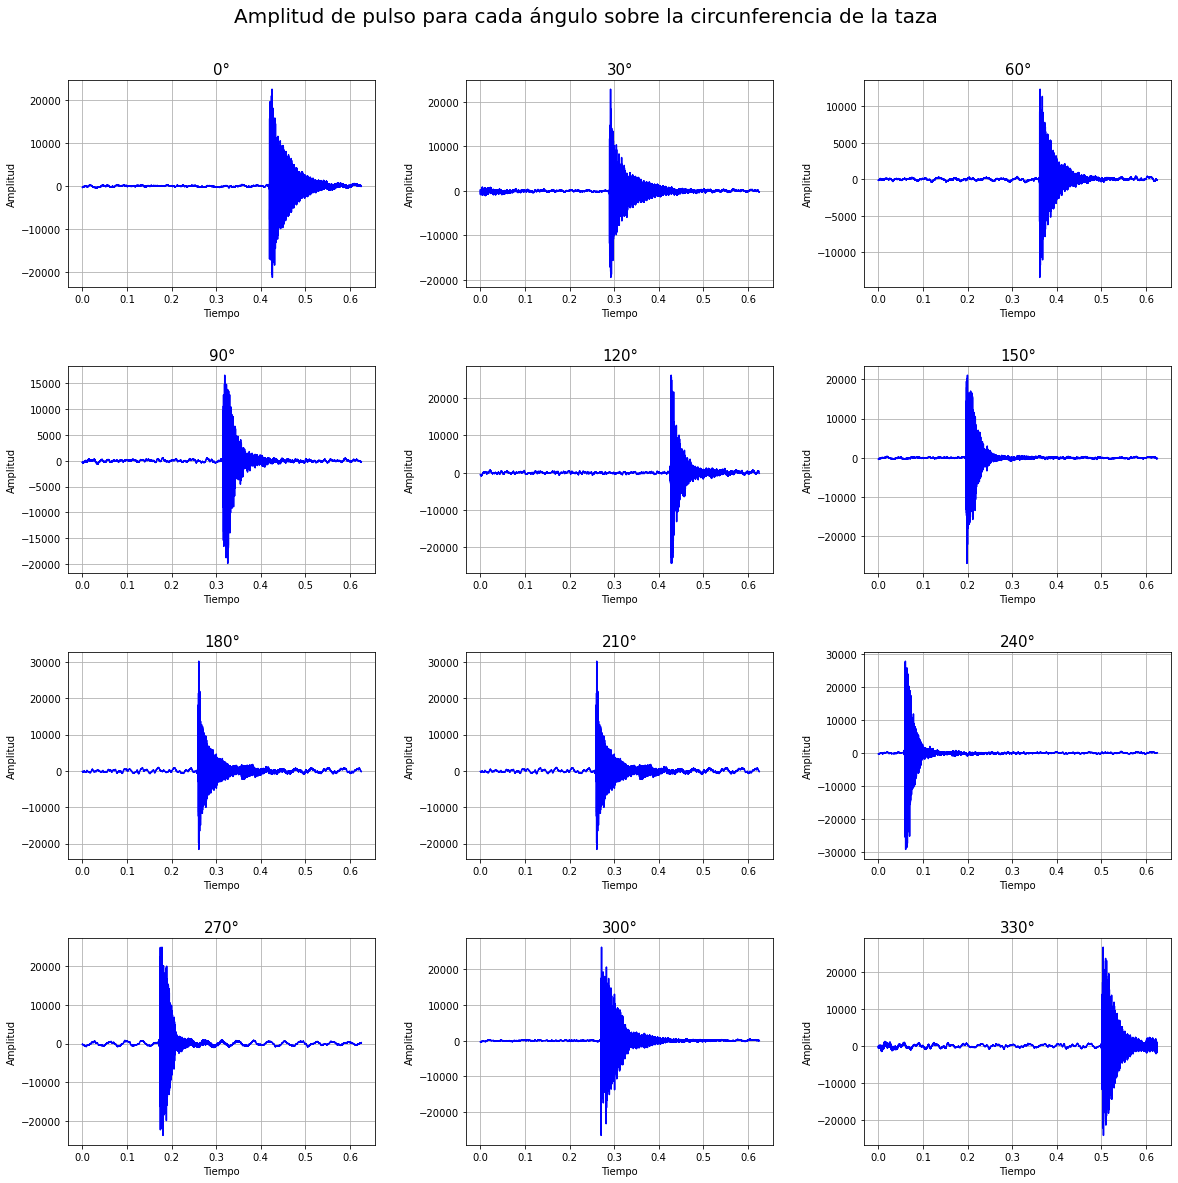

In [84]:
fig, axs = plt.subplots(4,3,figsize=(17,17))

fig.suptitle('Amplitud de pulso para cada ángulo sobre la circunferencia de la taza ', fontsize=20)


axs[0,0].set_title('0°', fontsize=15)
axs[0,0].plot(times[0],amplitud[0], color='b')
axs[0,0].set_ylabel('Amplitud', fontsize=10)
axs[0,0].set_xlabel('Tiempo', fontsize=10)
axs[0,0].grid()

axs[0,1].set_title('30°', fontsize=15)
axs[0,1].plot(times[1],amplitud[1], color='b')
axs[0,1].set_ylabel('Amplitud', fontsize=10)
axs[0,1].set_xlabel('Tiempo', fontsize=10)
axs[0,1].grid()

axs[0,2].set_title('60°', fontsize=15)
axs[0,2].plot(times[2],amplitud[2], color='b')
axs[0,2].set_ylabel('Amplitud', fontsize=10)
axs[0,2].set_xlabel('Tiempo', fontsize=10)
axs[0,2].grid()

axs[1,0].set_title('90°', fontsize=15)
axs[1,0].plot(times[3],amplitud[3], color='b')
axs[1,0].set_ylabel('Amplitud', fontsize=10)
axs[1,0].set_xlabel('Tiempo', fontsize=10)
axs[1,0].grid()

axs[1,1].set_title('120°', fontsize=15)
axs[1,1].plot(times[4],amplitud[4], color='b')
axs[1,1].set_ylabel('Amplitud', fontsize=10)
axs[1,1].set_xlabel('Tiempo', fontsize=10)
axs[1,1].grid()

axs[1,2].set_title('150°', fontsize=15)
axs[1,2].plot(times[5],amplitud[5], color='b')
axs[1,2].set_ylabel('Amplitud', fontsize=10)
axs[1,2].set_xlabel('Tiempo', fontsize=10)
axs[1,2].grid()

axs[2,0].set_title('180°', fontsize=15)
axs[2,0].plot(times[6],amplitud[6], color='b')
axs[2,0].set_ylabel('Amplitud', fontsize=10)
axs[2,0].set_xlabel('Tiempo', fontsize=10)
axs[2,0].grid()

axs[2,1].set_title('210°', fontsize=15)
axs[2,1].plot(times[7],amplitud[7], color='b')
axs[2,1].set_ylabel('Amplitud', fontsize=10)
axs[2,1].set_xlabel('Tiempo', fontsize=10)
axs[2,1].grid()

axs[2,2].set_title('240°', fontsize=15)
axs[2,2].plot(times[8],amplitud[8], color='b')
axs[2,2].set_ylabel('Amplitud', fontsize=10)
axs[2,2].set_xlabel('Tiempo', fontsize=10)
axs[2,2].grid()

axs[3,0].set_title('270°', fontsize=15)
axs[3,0].plot(times[9],amplitud[9], color='b')
axs[3,0].set_ylabel('Amplitud', fontsize=10)
axs[3,0].set_xlabel('Tiempo', fontsize=10)
axs[3,0].grid()

axs[3,1].set_title('300°', fontsize=15)
axs[3,1].plot(times[10],amplitud[10], color='b')
axs[3,1].set_ylabel('Amplitud', fontsize=10)
axs[3,1].set_xlabel('Tiempo', fontsize=10)
axs[3,1].grid()

axs[3,2].set_title('330°', fontsize=15)
axs[3,2].plot(times[11],amplitud[11], color='b')
axs[3,2].set_ylabel('Amplitud', fontsize=10)
axs[3,2].set_xlabel('Tiempo', fontsize=10)
axs[3,2].grid()


fig.tight_layout(pad=3.0)

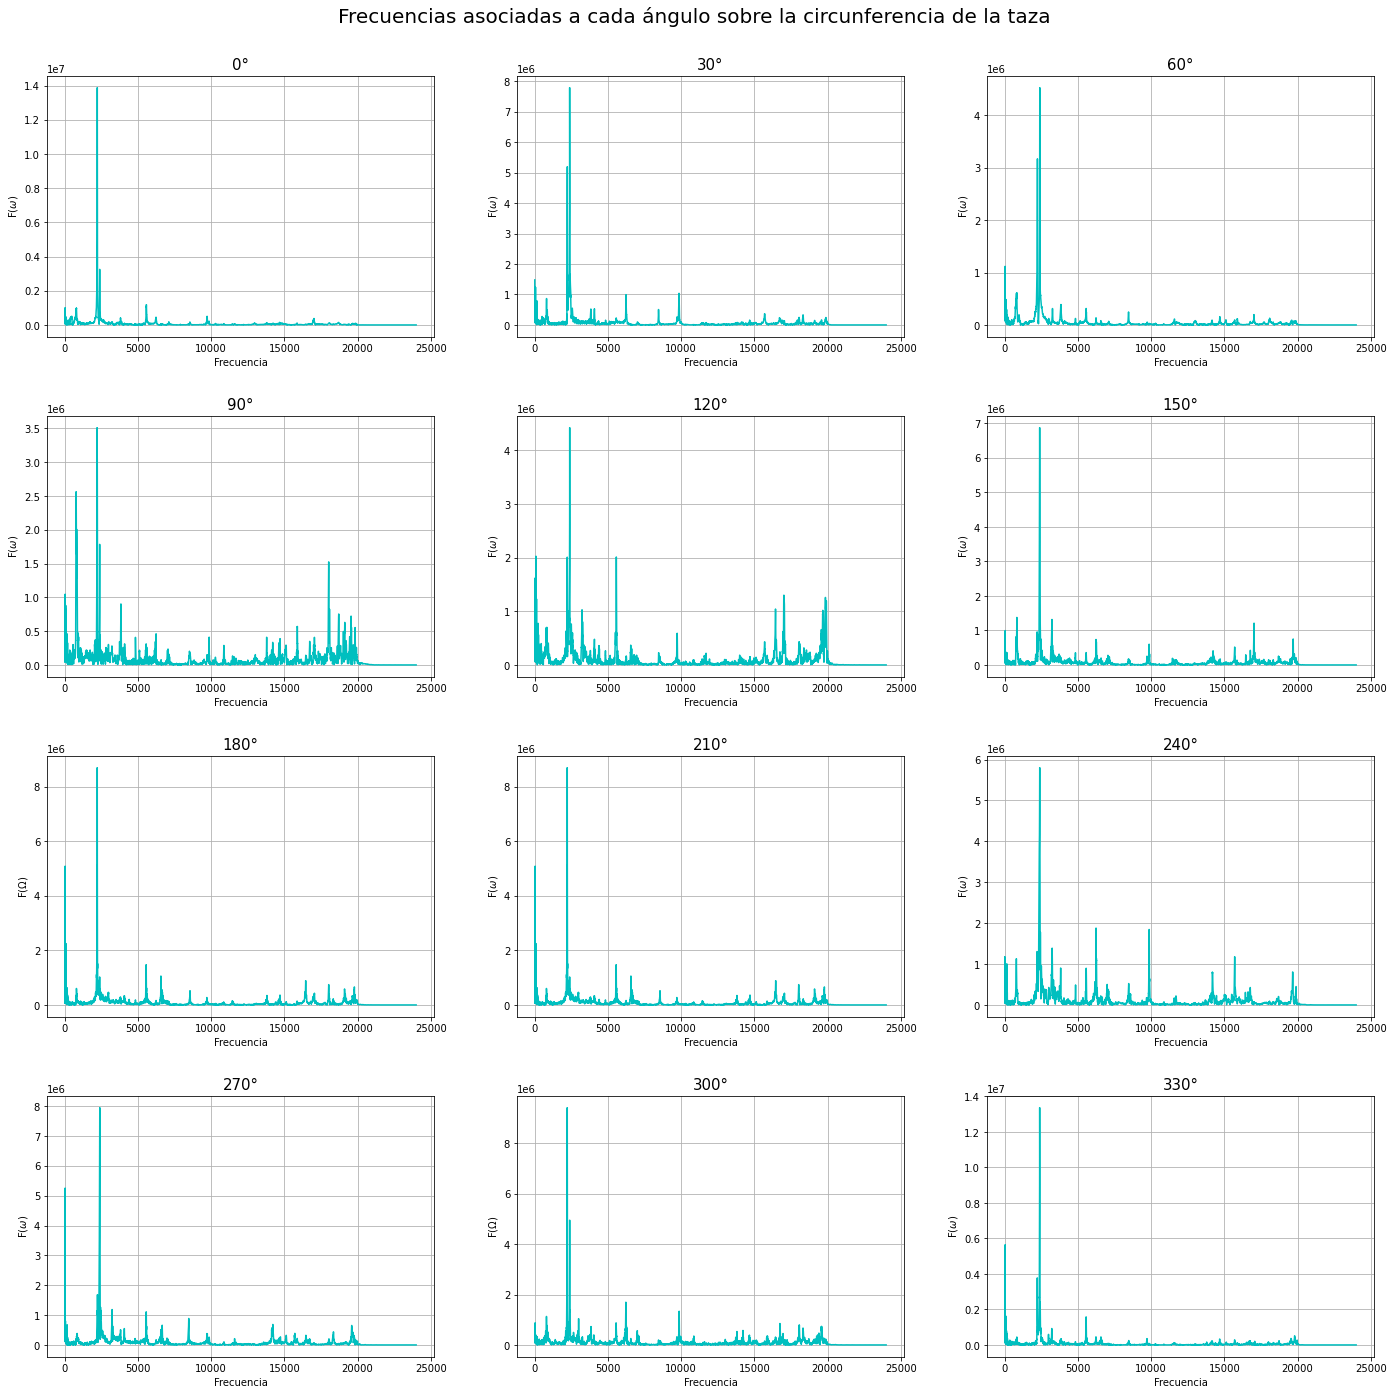

In [83]:
fig, axs = plt.subplots(4,3,figsize=(20,20))

fig.suptitle('Frecuencias asociadas a cada ángulo sobre la circunferencia de la taza ', fontsize=20)


axs[0,0].set_title('0°', fontsize=15)
axs[0,0].plot(freq_fft[0],amp_fft[0], color='c')
axs[0,0].set_ylabel(r'F($\omega$)', fontsize=10)
axs[0,0].set_xlabel('Frecuencia', fontsize=10)
axs[0,0].grid()

axs[0,1].set_title('30°', fontsize=15)
axs[0,1].plot(freq_fft[1],amp_fft[1], color='c')
axs[0,1].set_ylabel(r'F($\omega$)', fontsize=10)
axs[0,1].set_xlabel('Frecuencia', fontsize=10)
axs[0,1].grid()

axs[0,2].set_title('60°', fontsize=15)
axs[0,2].plot(freq_fft[2],amp_fft[2], color='c')
axs[0,2].set_ylabel('F($\omega$)', fontsize=10)
axs[0,2].set_xlabel('Frecuencia', fontsize=10)
axs[0,2].grid()

axs[1,0].set_title('90°', fontsize=15)
axs[1,0].plot(freq_fft[3],amp_fft[3], color='c')
axs[1,0].set_ylabel('F($\omega$)', fontsize=10)
axs[1,0].set_xlabel('Frecuencia', fontsize=10)
axs[1,0].grid()

axs[1,1].set_title('120°', fontsize=15)
axs[1,1].plot(freq_fft[4],amp_fft[4], color='c')
axs[1,1].set_ylabel('F($\omega$)', fontsize=10)
axs[1,1].set_xlabel('Frecuencia', fontsize=10)
axs[1,1].grid()

axs[1,2].set_title('150°', fontsize=15)
axs[1,2].plot(freq_fft[5],amp_fft[5], color='c')
axs[1,2].set_ylabel('F($\omega$)', fontsize=10)
axs[1,2].set_xlabel('Frecuencia', fontsize=10)
axs[1,2].grid()

axs[2,0].set_title('180°', fontsize=15)
axs[2,0].plot(freq_fft[6],amp_fft[6], color='c')
axs[2,0].set_ylabel('F($\Omega$)', fontsize=10)
axs[2,0].set_xlabel('Frecuencia', fontsize=10)
axs[2,0].grid()

axs[2,1].set_title('210°', fontsize=15)
axs[2,1].plot(freq_fft[7],amp_fft[7], color='c')
axs[2,1].set_ylabel('F($\omega$)', fontsize=10)
axs[2,1].set_xlabel('Frecuencia', fontsize=10)
axs[2,1].grid()

axs[2,2].set_title('240°', fontsize=15)
axs[2,2].plot(freq_fft[8],amp_fft[8], color='c')
axs[2,2].set_ylabel('F($\omega$)', fontsize=10)
axs[2,2].set_xlabel('Frecuencia', fontsize=10)
axs[2,2].grid()

axs[3,0].set_title('270°', fontsize=15)
axs[3,0].plot(freq_fft[9],amp_fft[9], color='c')
axs[3,0].set_ylabel('F($\omega$)', fontsize=10)
axs[3,0].set_xlabel('Frecuencia', fontsize=10)
axs[3,0].grid()

axs[3,1].set_title('300°', fontsize=15)
axs[3,1].plot(freq_fft[10],amp_fft[10], color='c')
axs[3,1].set_ylabel('F($\Omega$)', fontsize=10)
axs[3,1].set_xlabel('Frecuencia', fontsize=10)
axs[3,1].grid()

axs[3,2].set_title('330°', fontsize=15)
axs[3,2].plot(freq_fft[11],amp_fft[11], color='c')
axs[3,2].set_ylabel('F($\omega$)', fontsize=10)
axs[3,2].set_xlabel('Frecuencia', fontsize=10)
axs[3,2].grid()


fig.tight_layout(pad=3.0)